In [2]:
import pandas as pd

test = pd.read_csv('test.csv')
# Melihat informasi dalam Dataset
test.info()

# Mendapatkan informasi deskriptif Dataset
test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [3]:
# Memeriksa jumlah yang hilang disetiap kolom
missing_values = test.isnull().sum()
missing_values[missing_values > 0]

,0
MSZoning,4
LotFrontage,227
Alley,1352
Utilities,2
Exterior1st,1
Exterior2nd,1
MasVnrType,894
MasVnrArea,15
BsmtQual,44
BsmtCond,45


In [4]:
# Memisahkan missing values  kurang dari 75% dan lebih dari 75%
less = missing_values[missing_values < 1000].index
over = missing_values[missing_values > 1000].index


In [5]:
# Mengisi nilai yang hilang dengan median pada kolom numerik
numeric_features = test[less].select_dtypes(include=['number']).columns
test[numeric_features] = test[numeric_features].fillna(test[numeric_features].median())

In [6]:
# Mengisi nilai yang hilang dengan mode untk kolom kategorikal
kategorikal_features = test[less].select_dtypes(include=['object']).columns
for column in kategorikal_features:
    test [column] = test[column].fillna(test[column].mode()[0])


# Menghapus kolom dengan terlalu banyak nilai
# # Ubah nama DataFrame menjadi 'df' supaya data asli tidak berubah dan dapat kita banding sebelum dan sesuah proses
df = test.drop(columns=over)

In [7]:
# Memeriksa kembali missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


,0


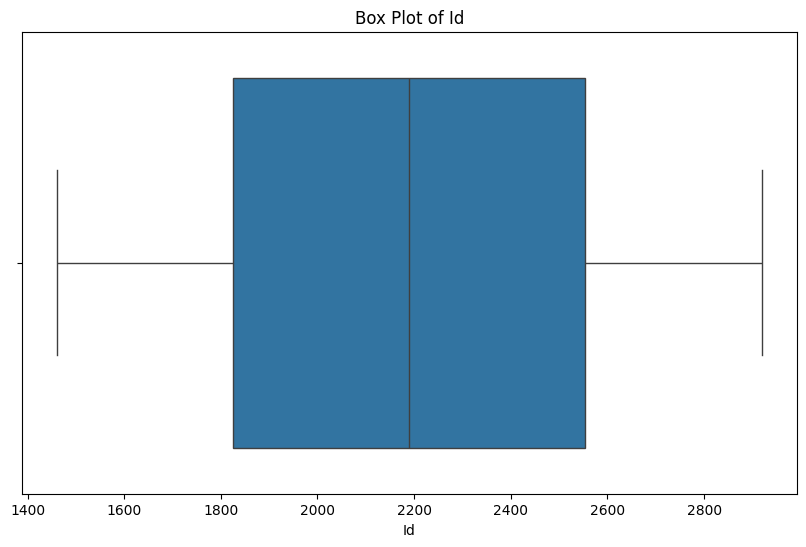

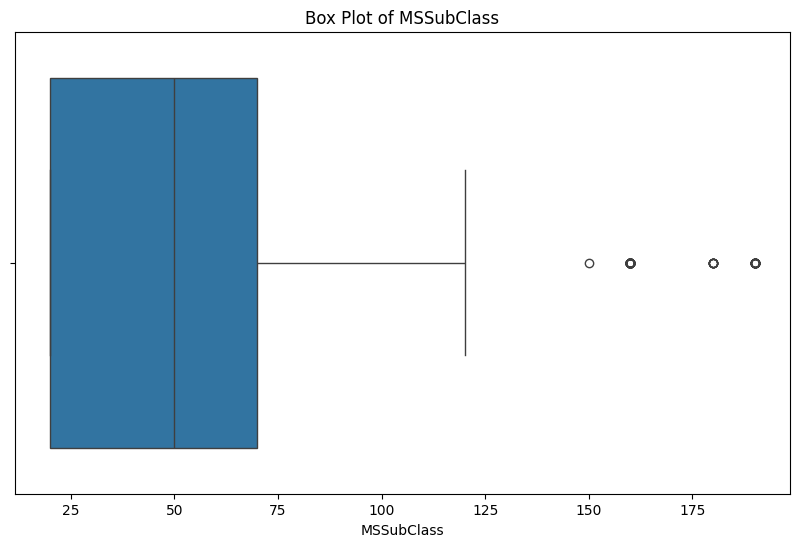

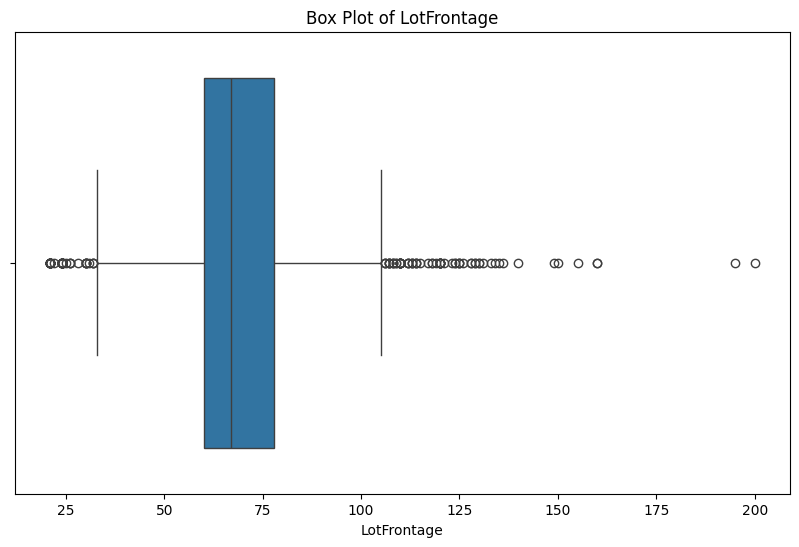

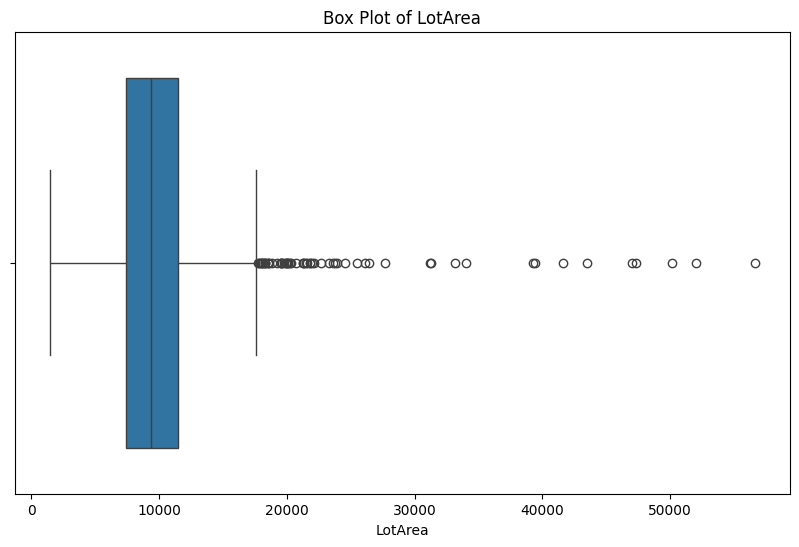

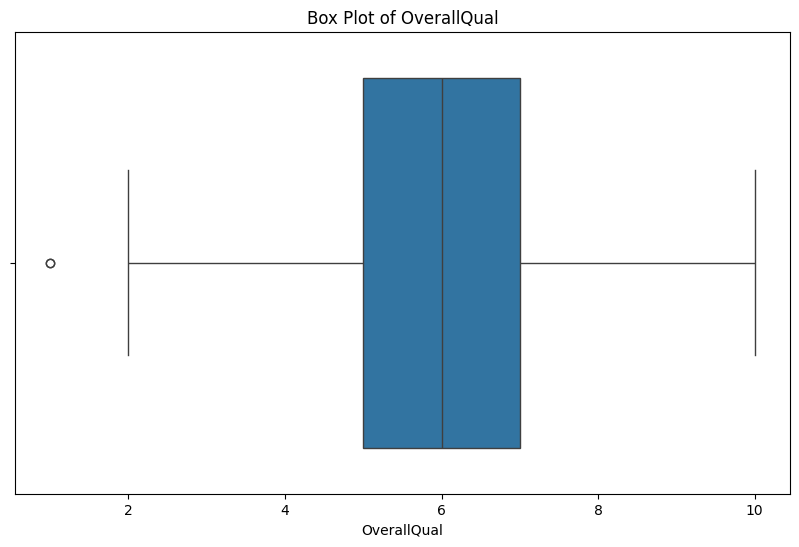

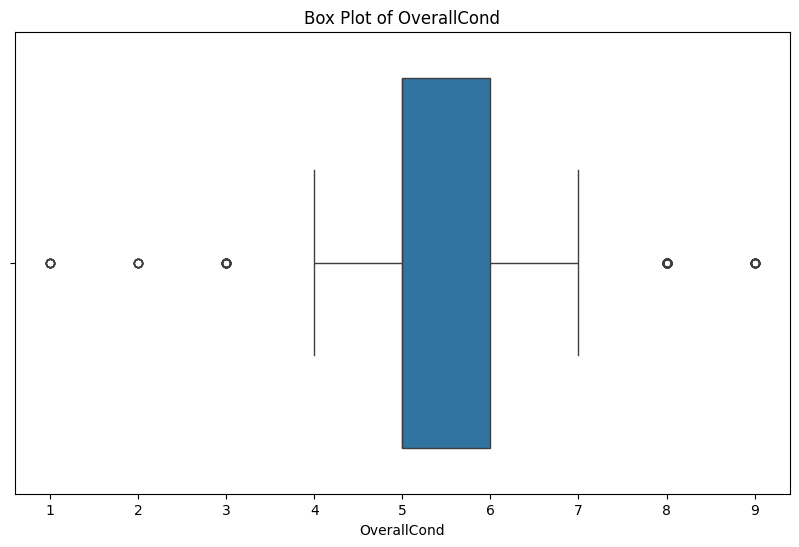

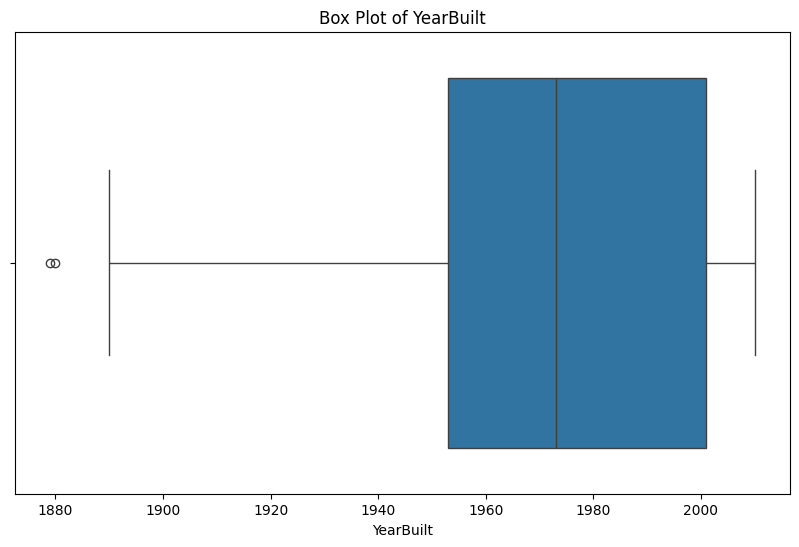

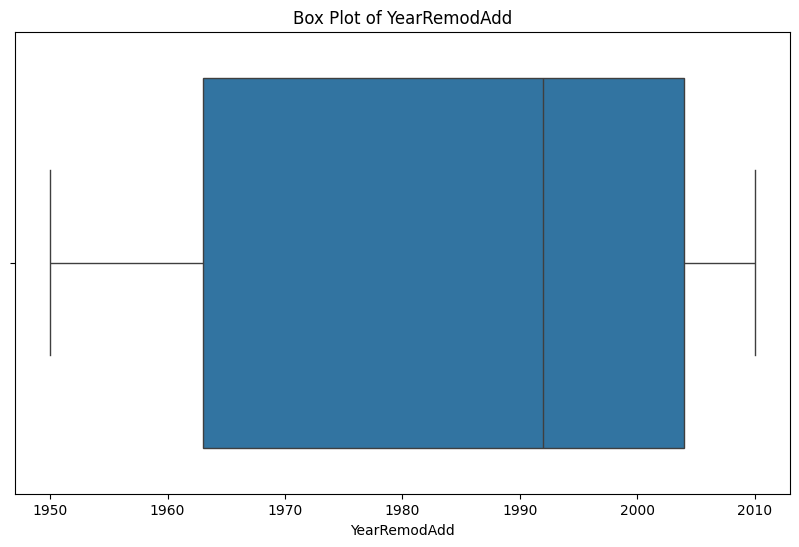

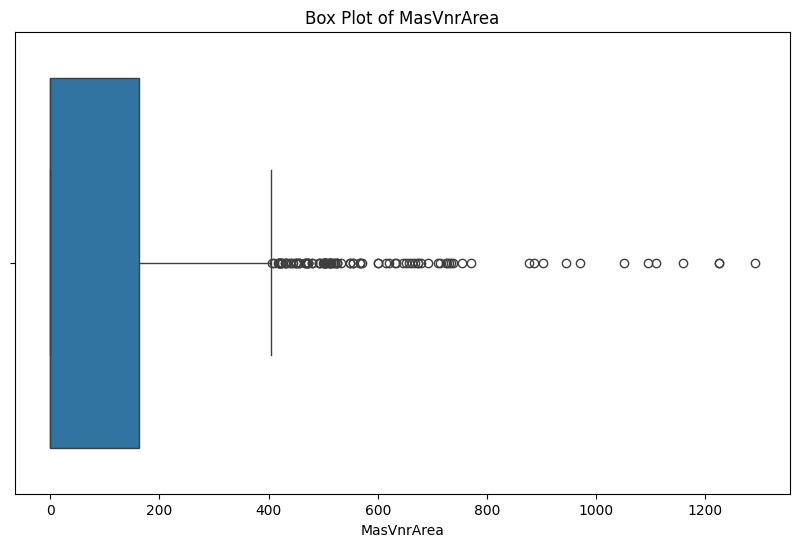

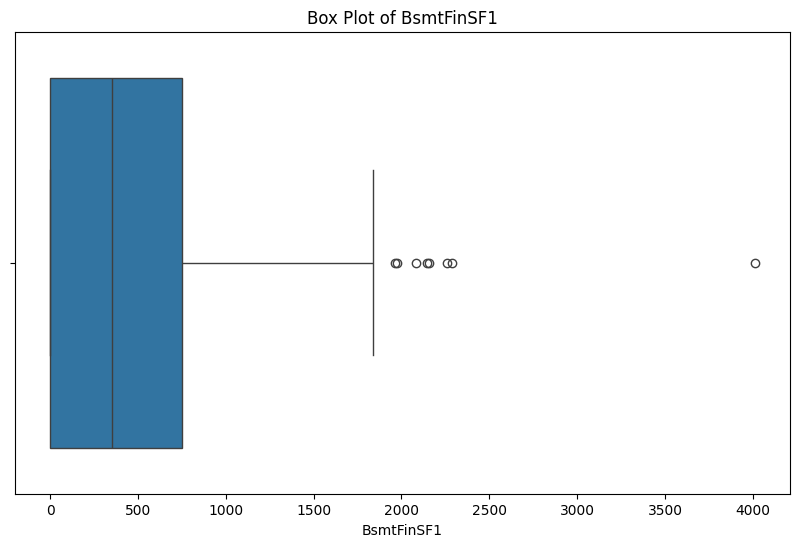

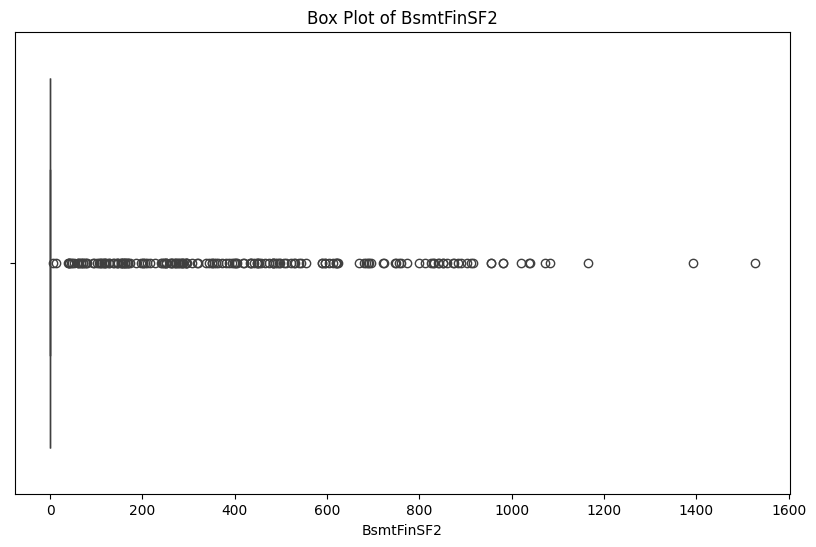

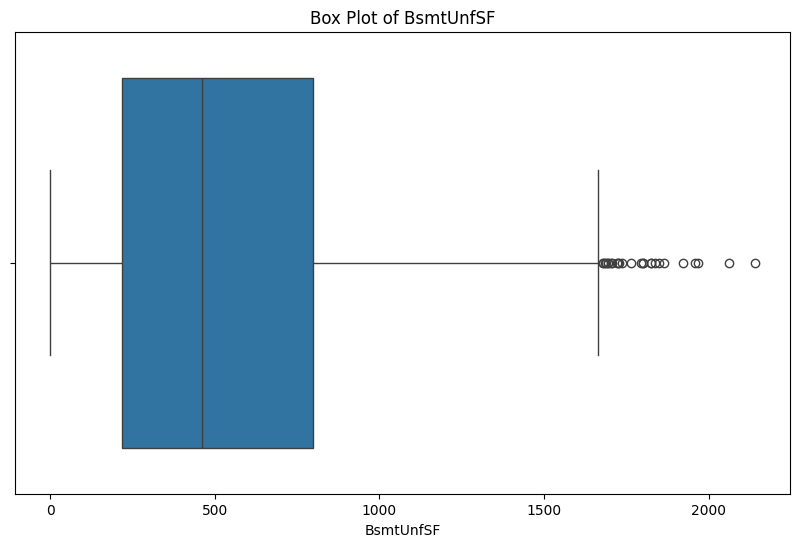

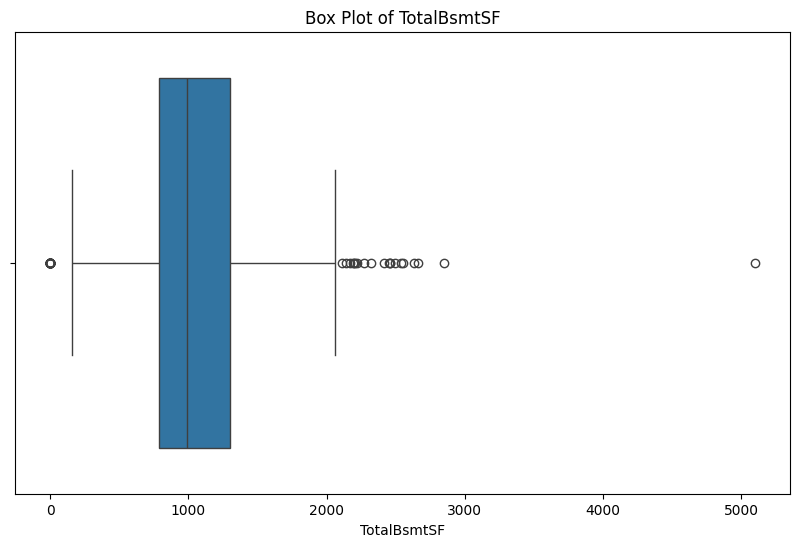

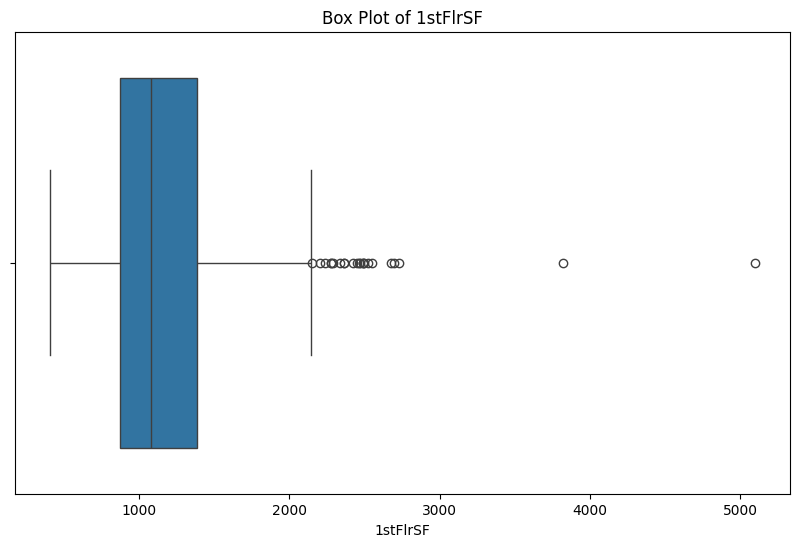

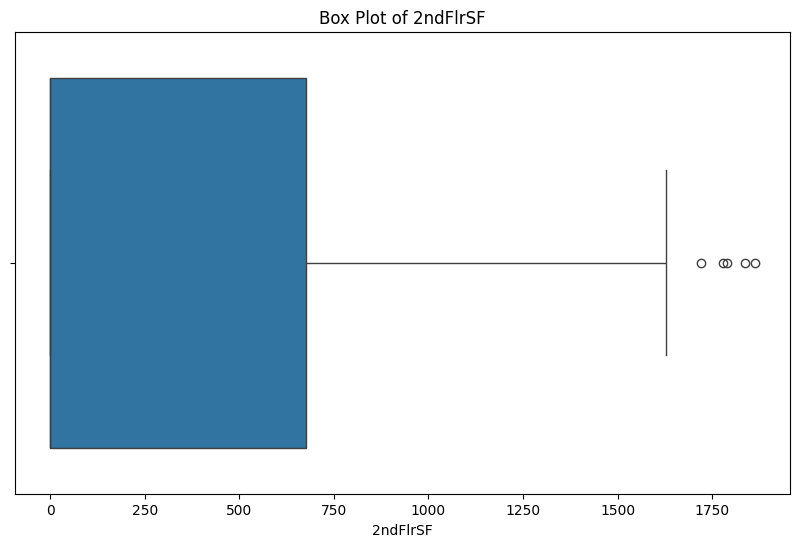

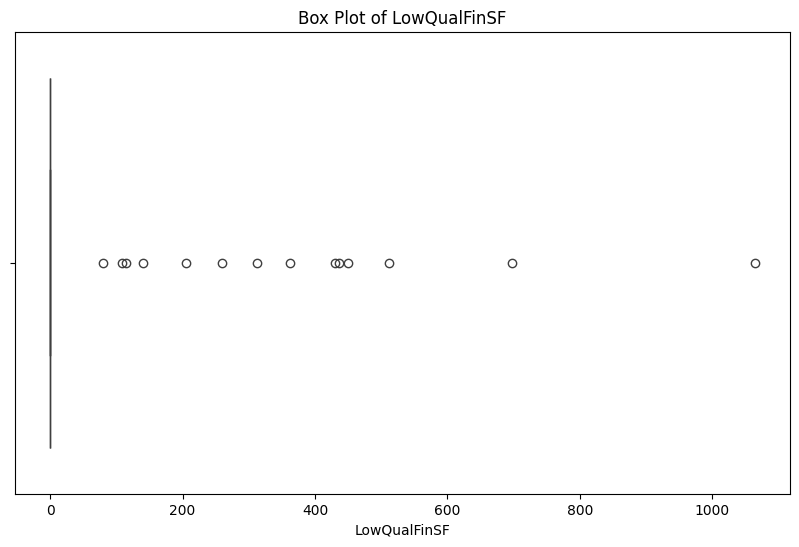

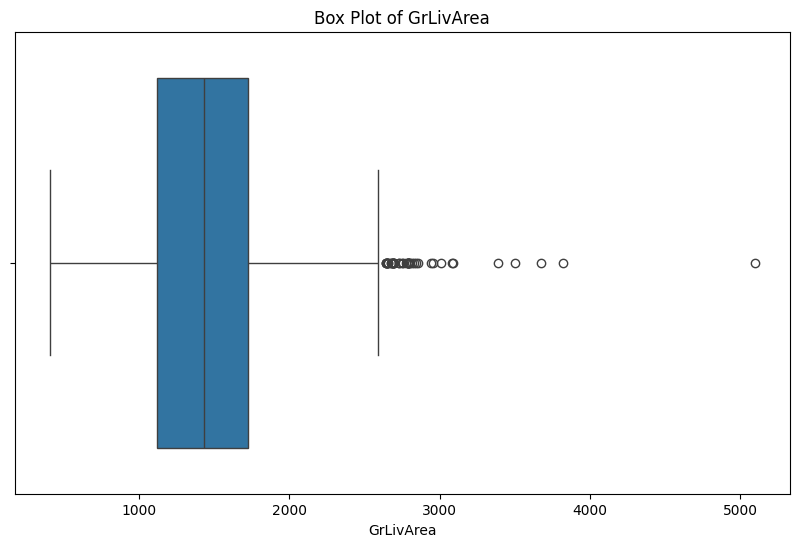

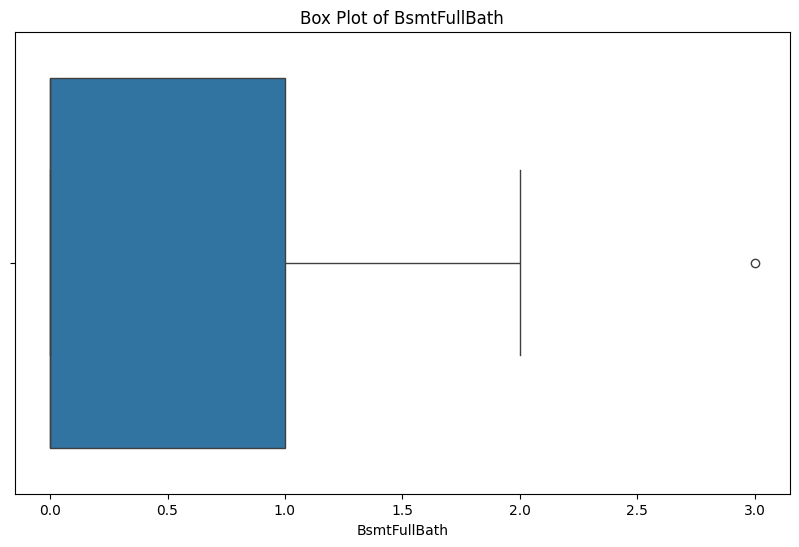

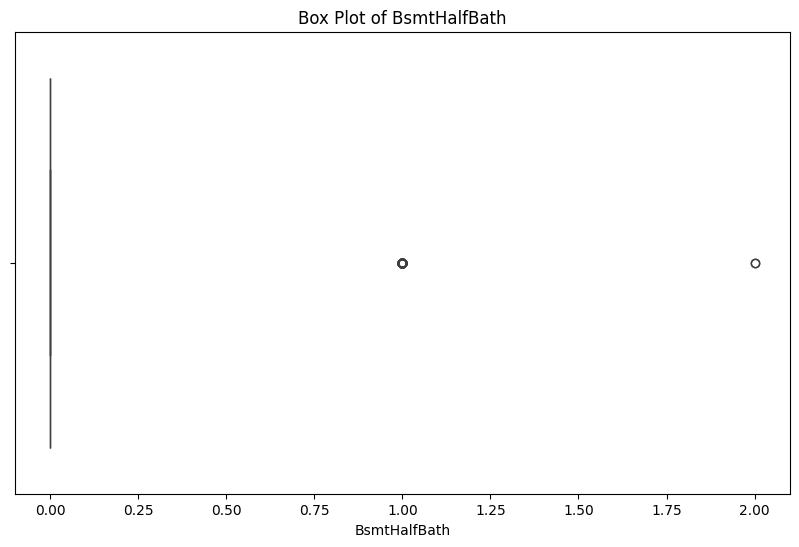

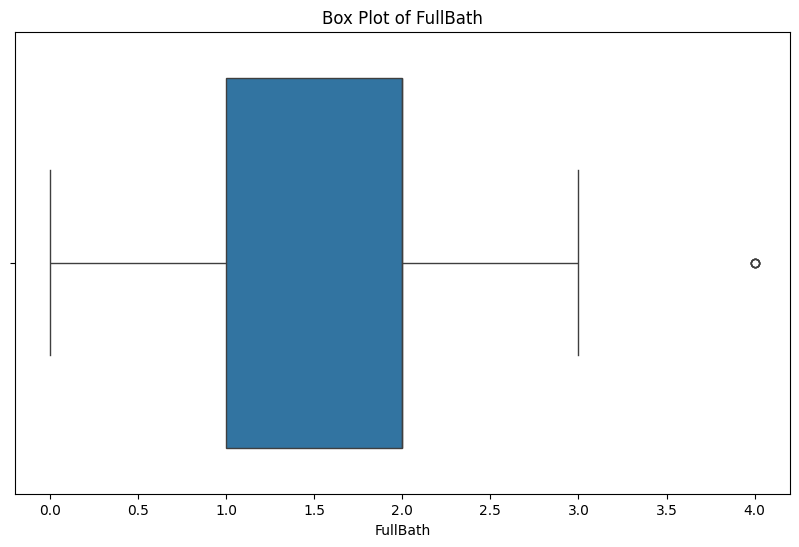

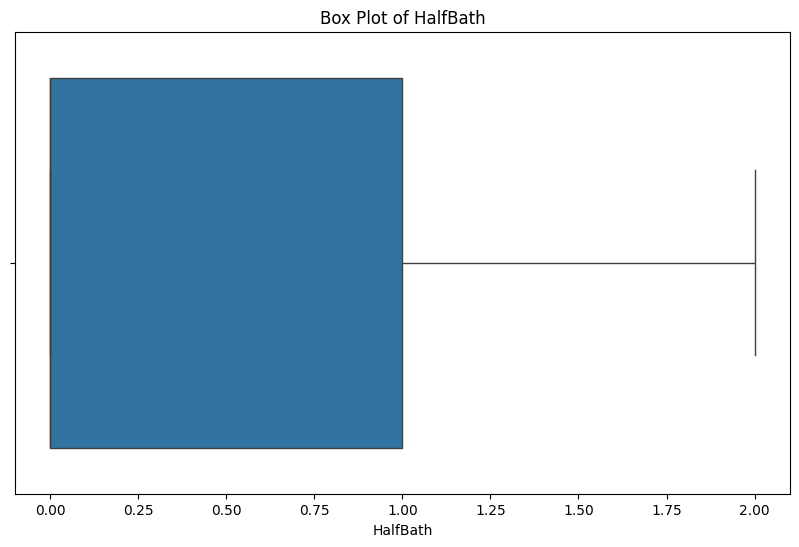

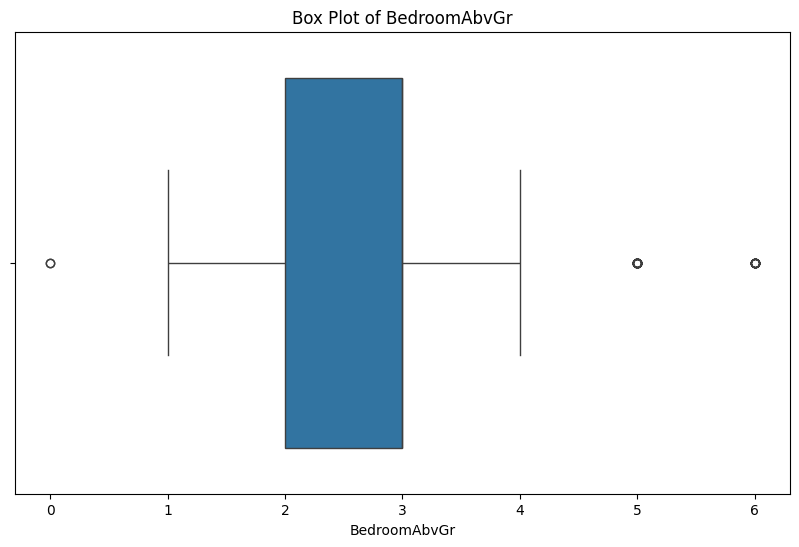

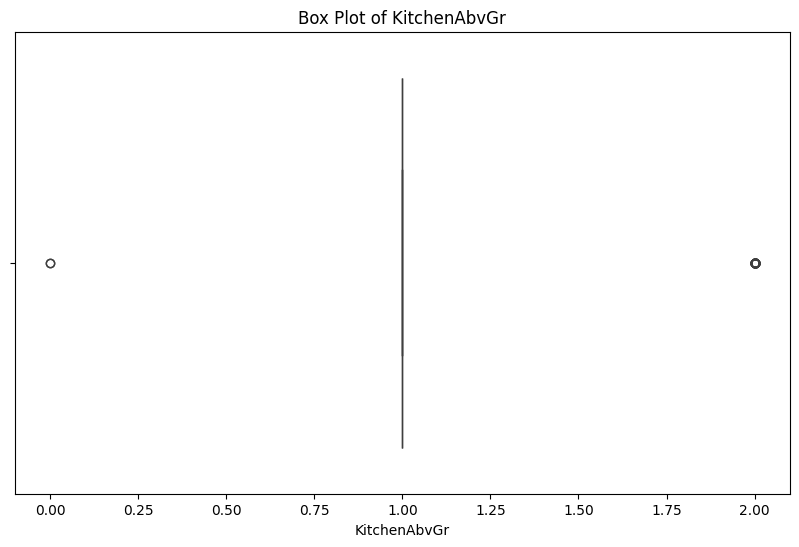

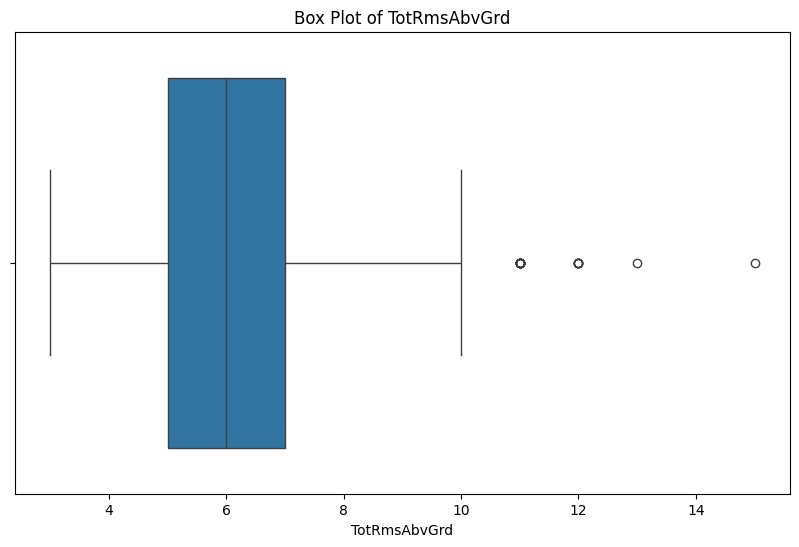

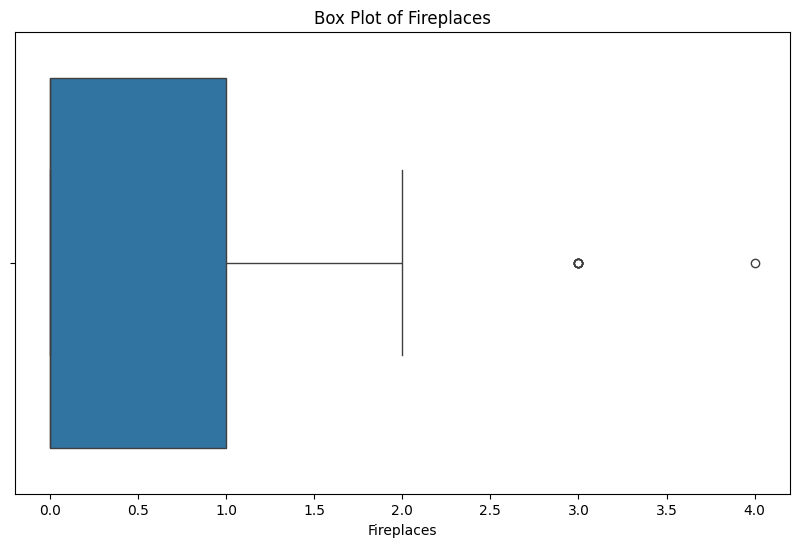

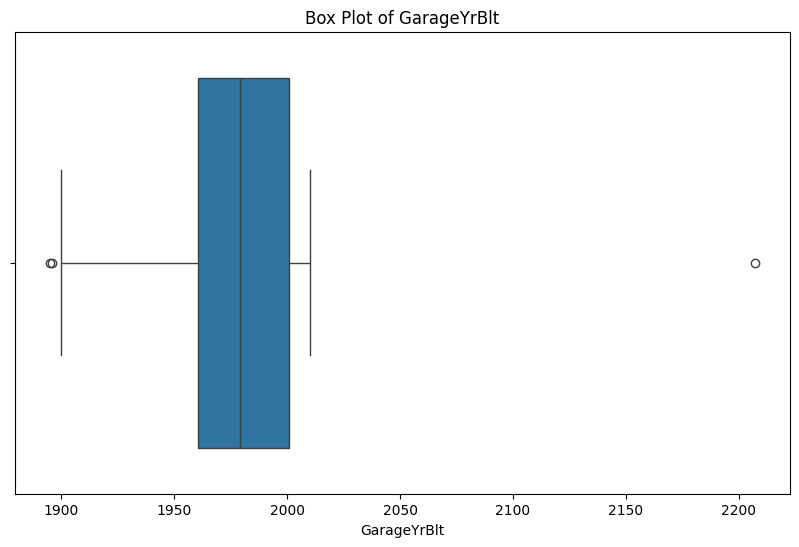

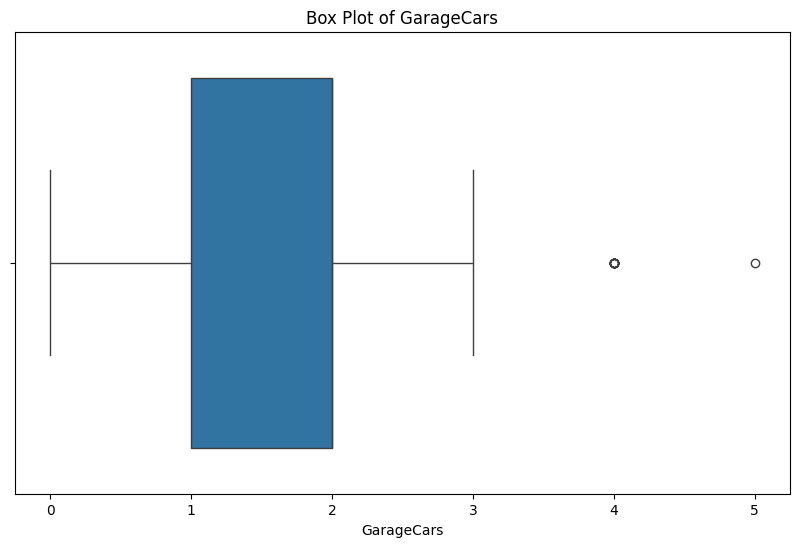

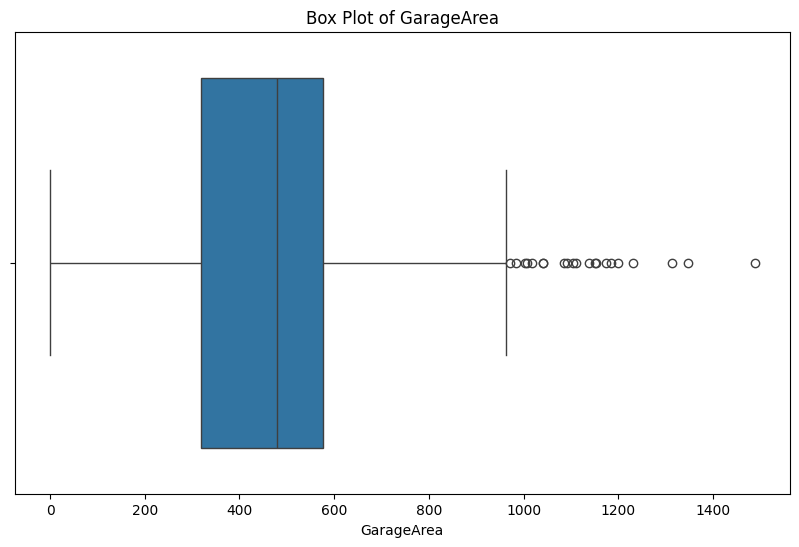

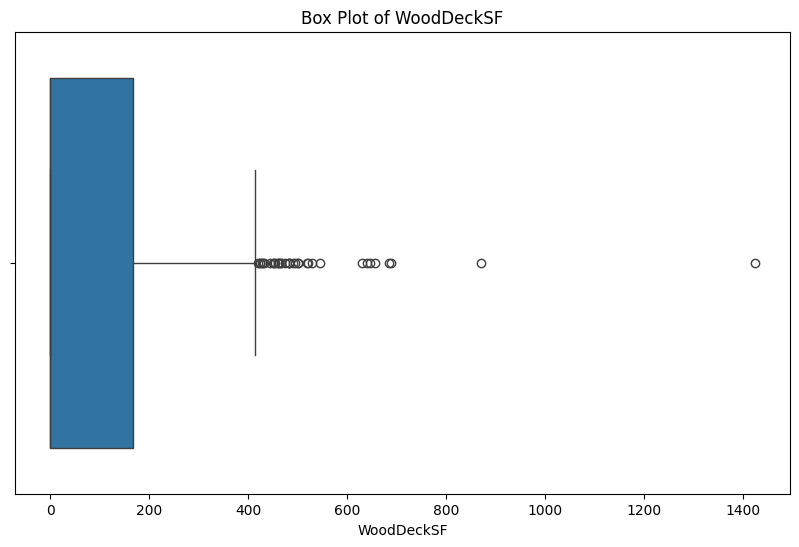

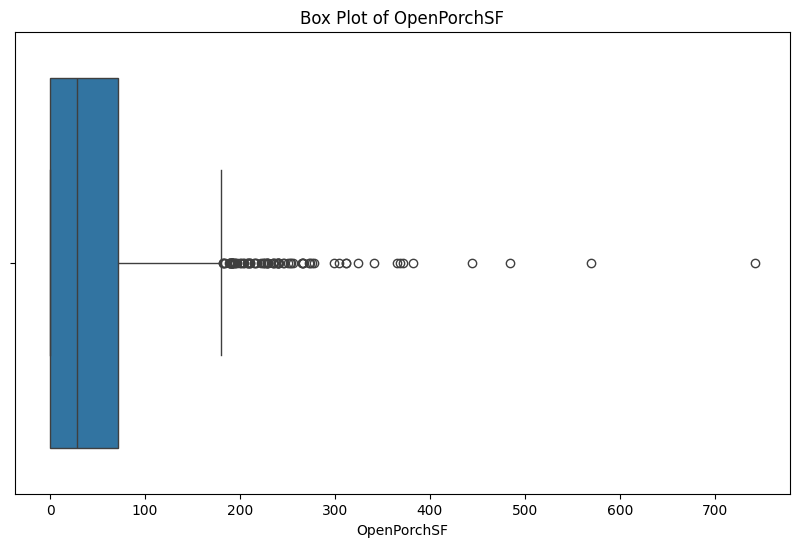

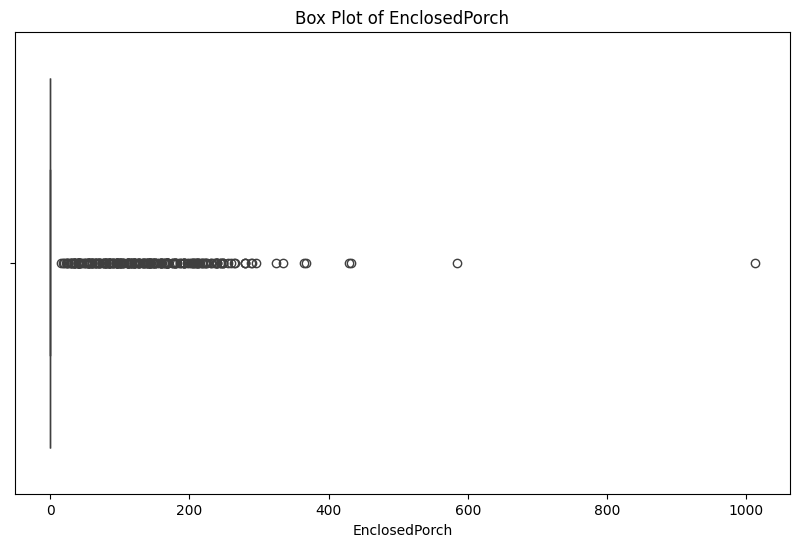

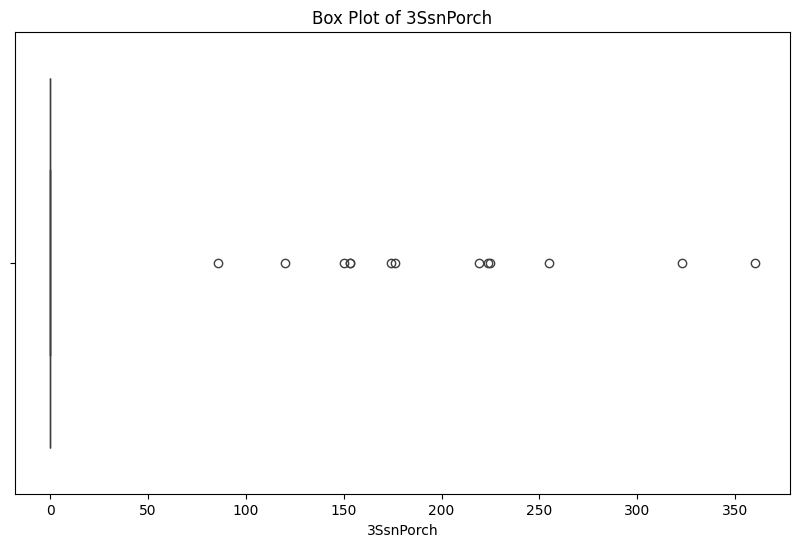

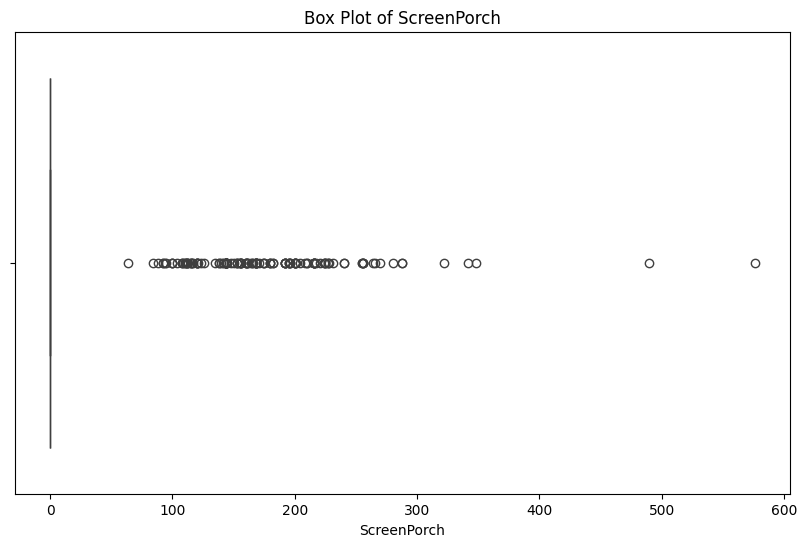

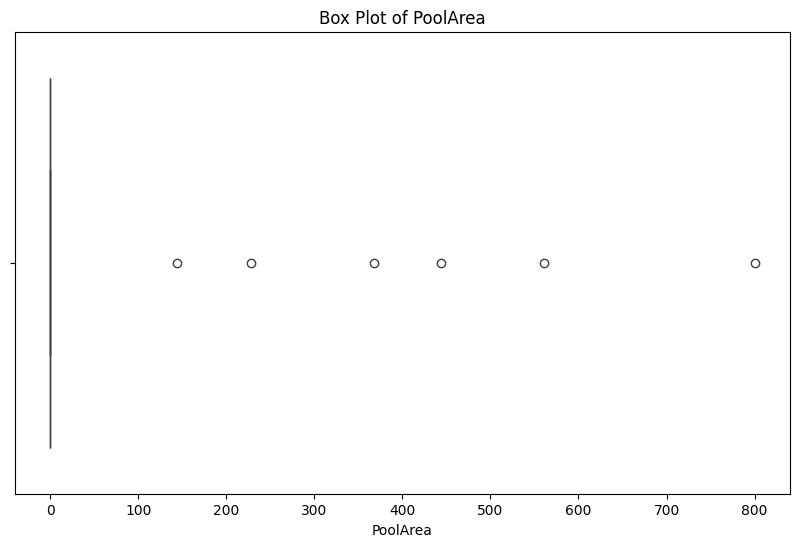

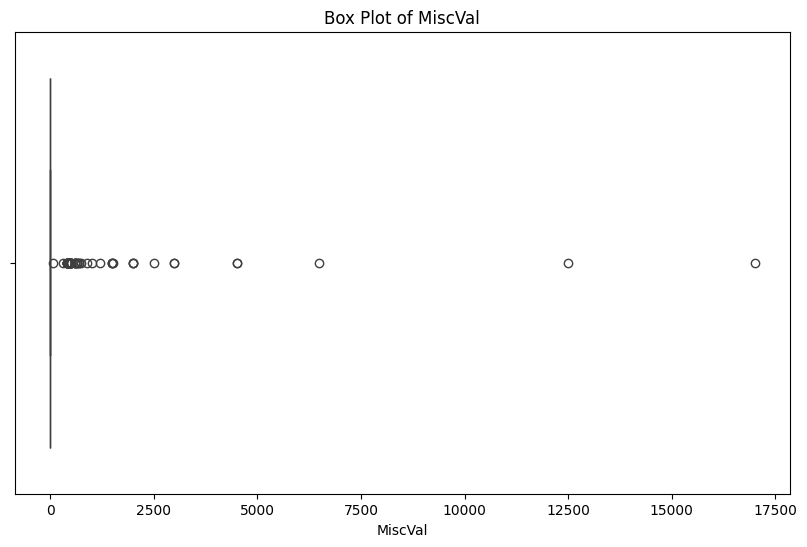

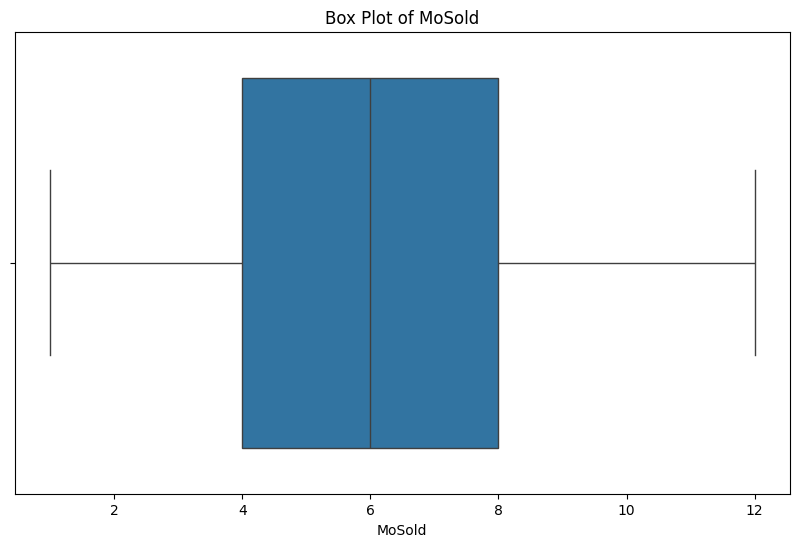

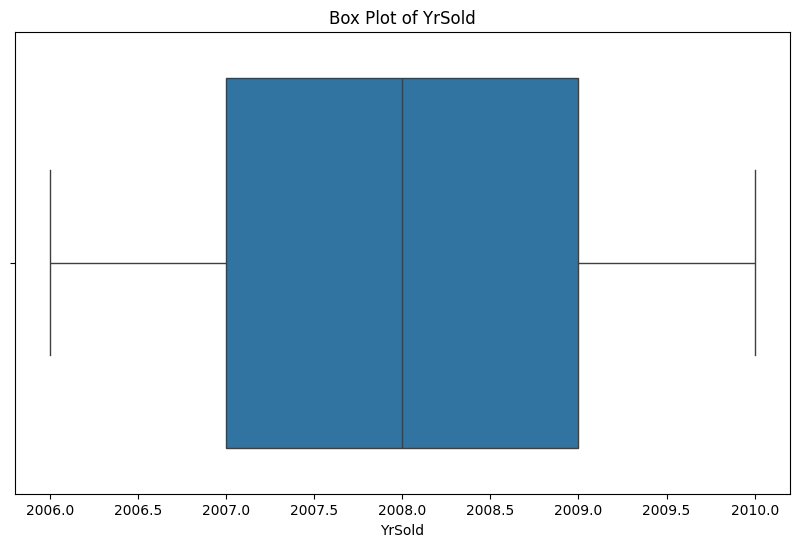

In [9]:
# Memeriksa dataset apakah ada Outlier

import seaborn as sns
import matplotlib.pyplot as plt

for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=(df[feature]))
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [10]:
# Mengatasi / mengidentifikasi outliers menggunakan IQR
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

# Filter DataFrame untuk menyimpan baris yang tidak mengandung outlier pada kolom numerik
condition = ~((df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)
df_filtered_numeric = df.loc[condition, numeric_features]

# Menggabungkan kembali dengan kolom kategorikal
categorical_features = df.select_dtypes(include='object').columns
df = pd.concat([df_filtered_numeric, df.loc[condition, categorical_features]], axis=1)


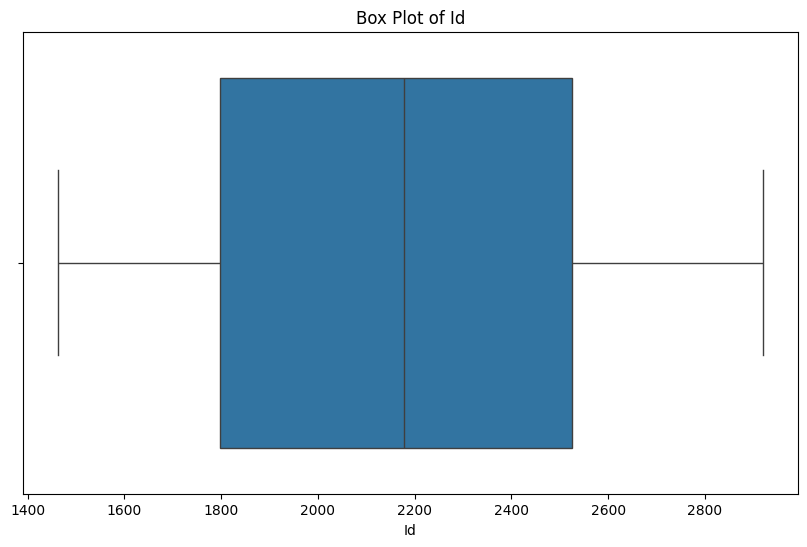

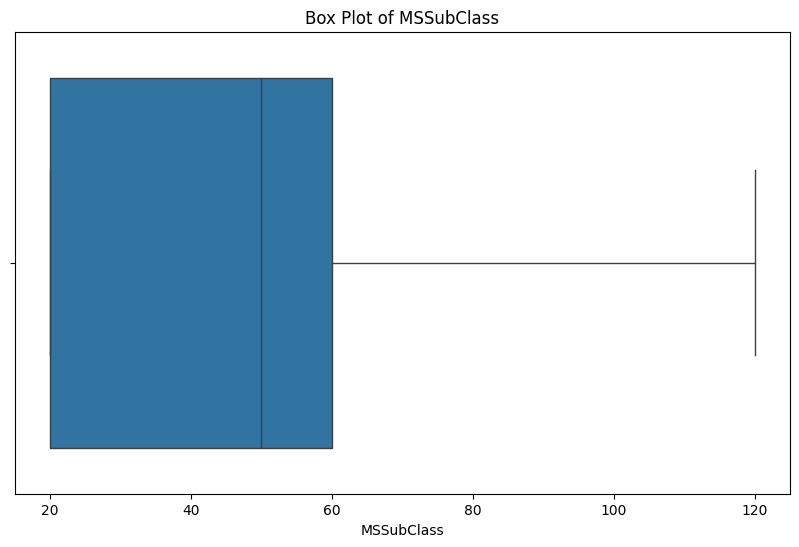

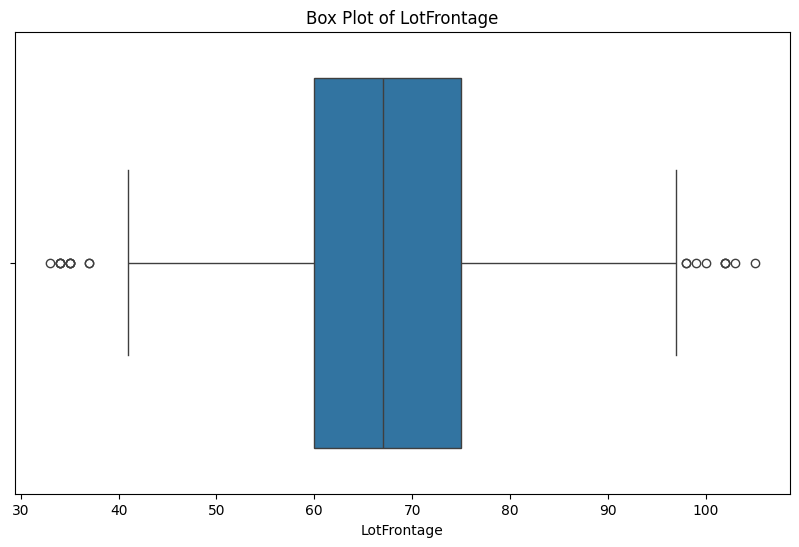

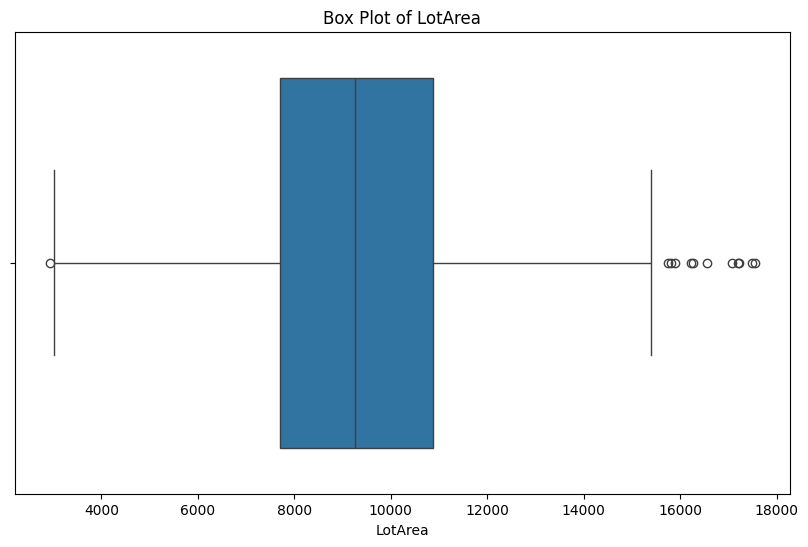

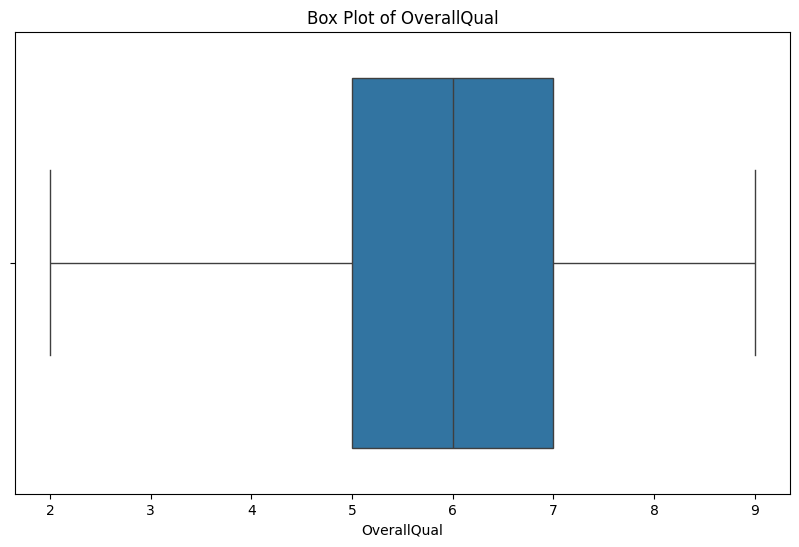

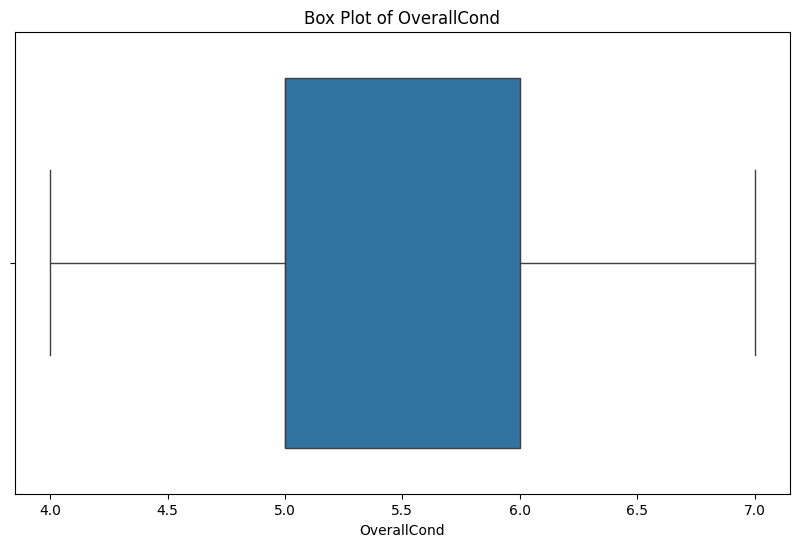

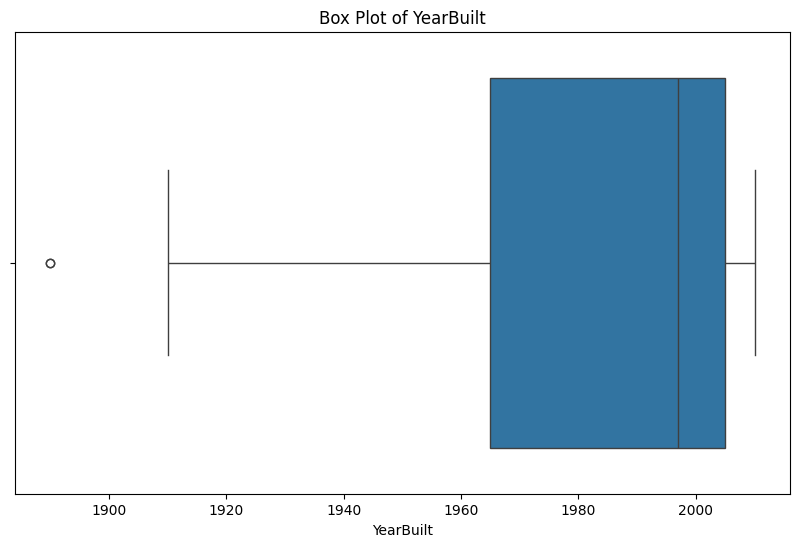

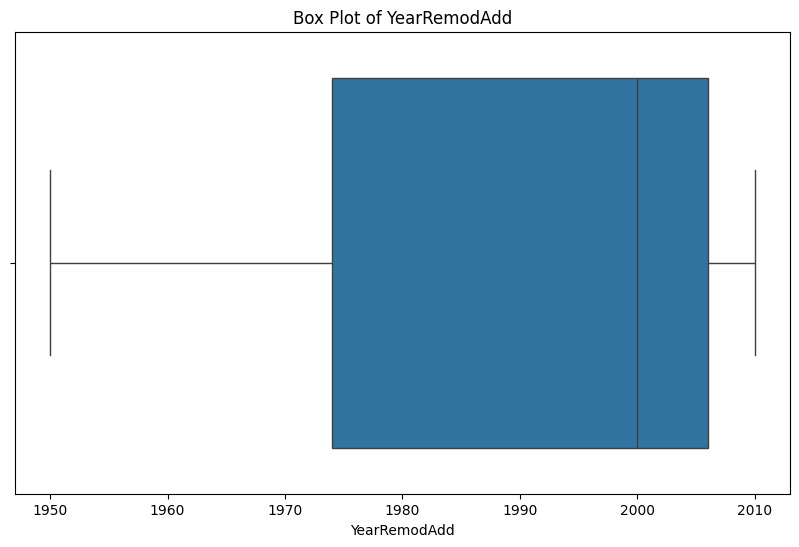

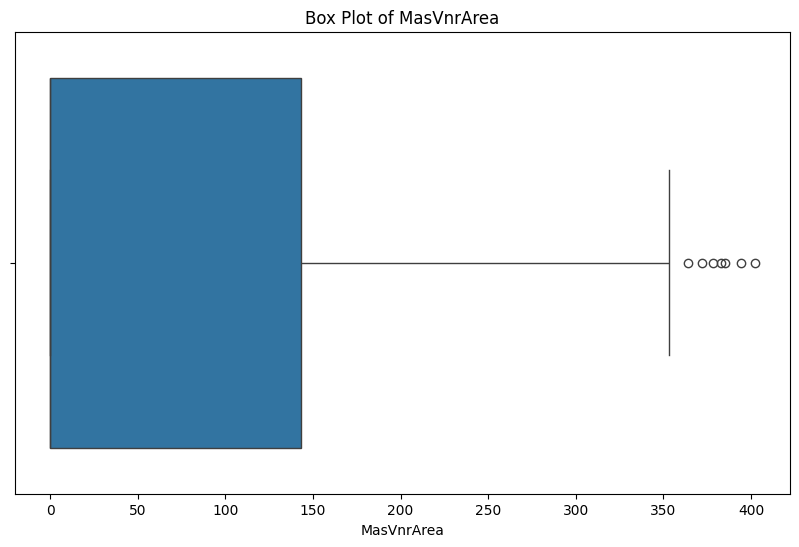

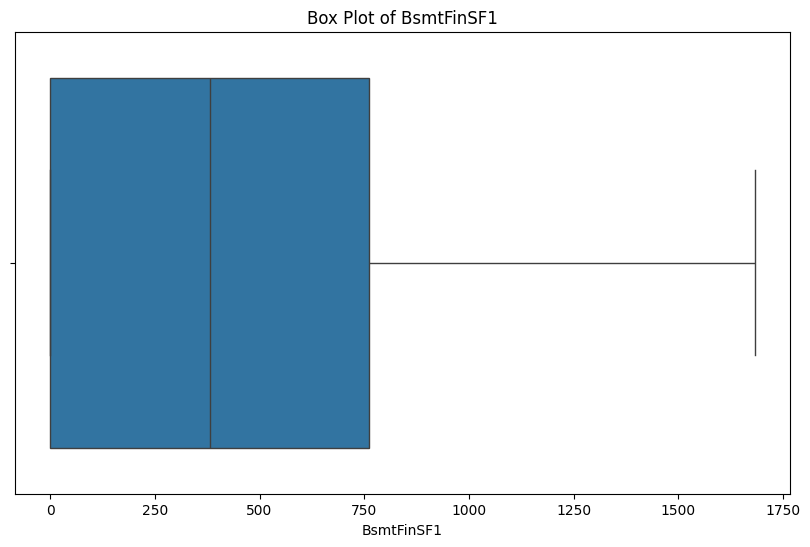

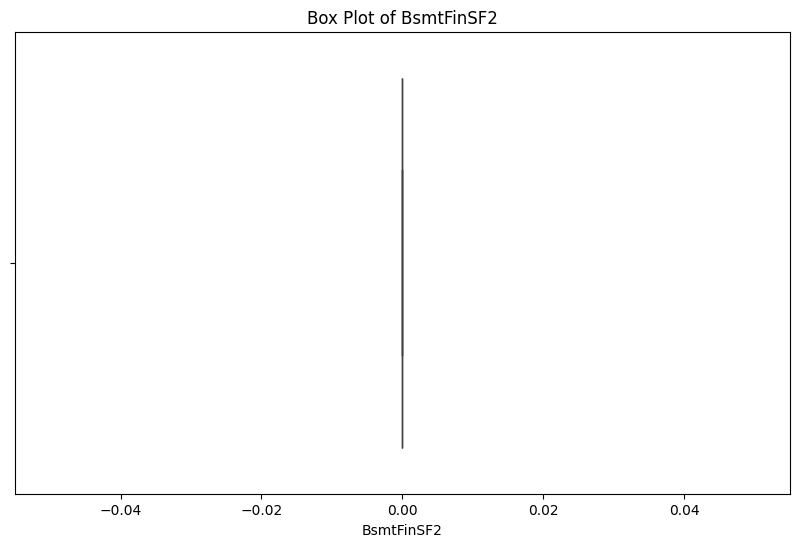

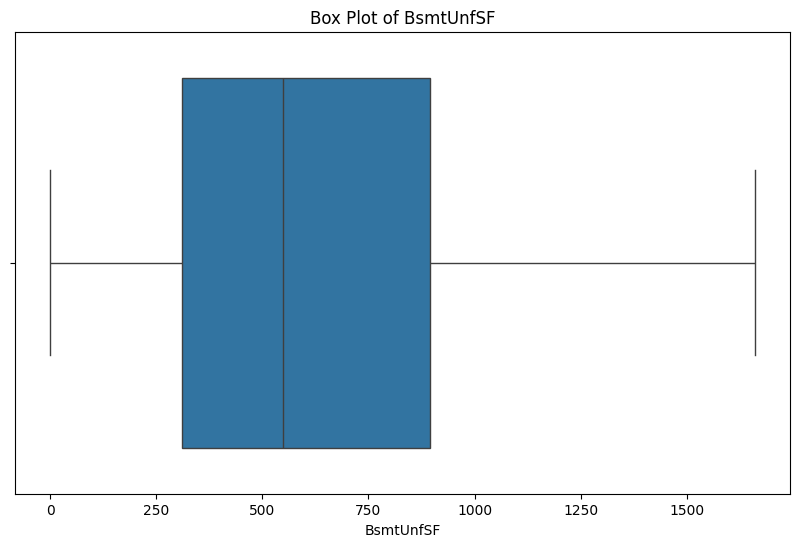

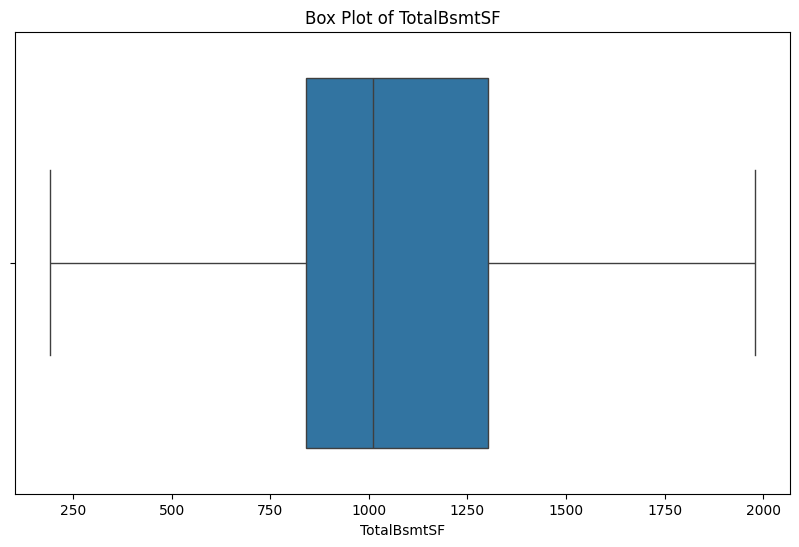

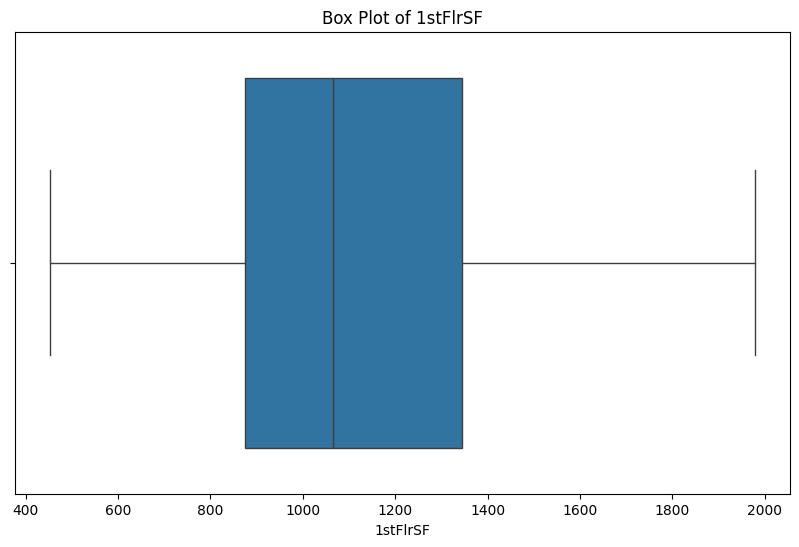

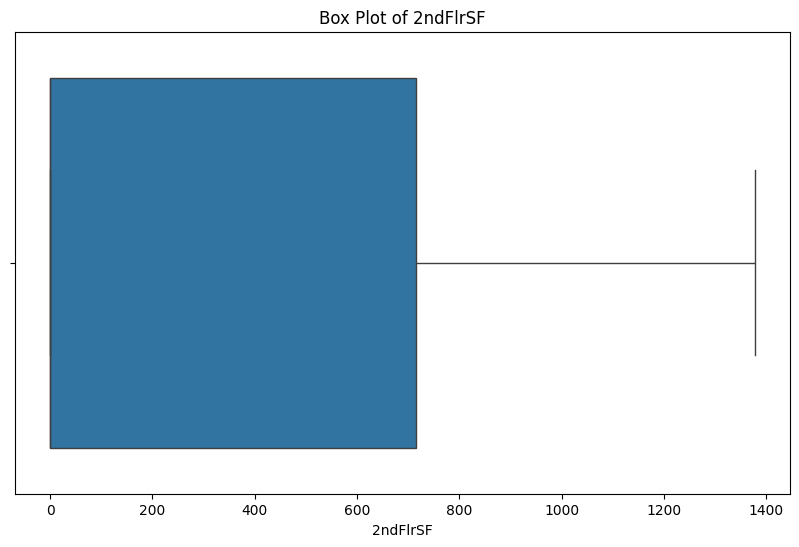

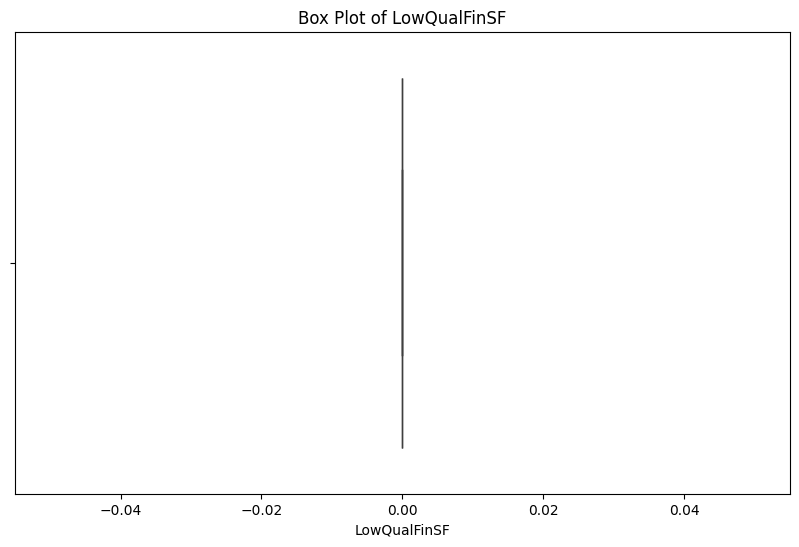

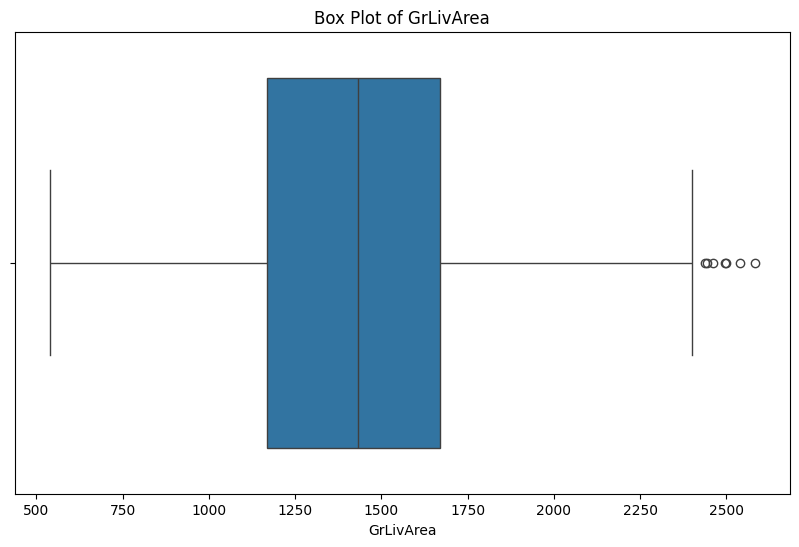

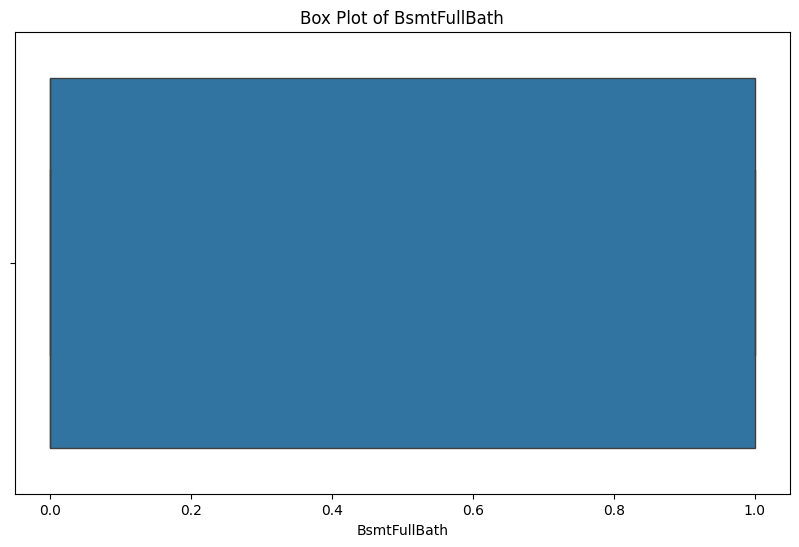

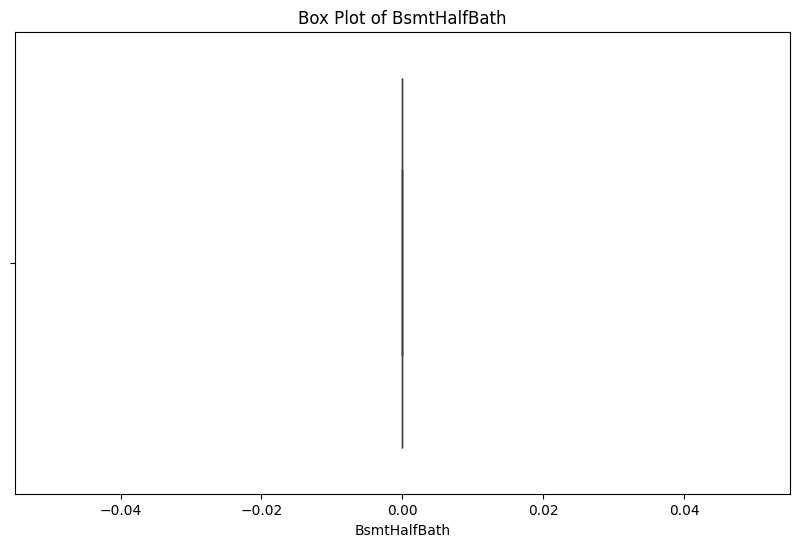

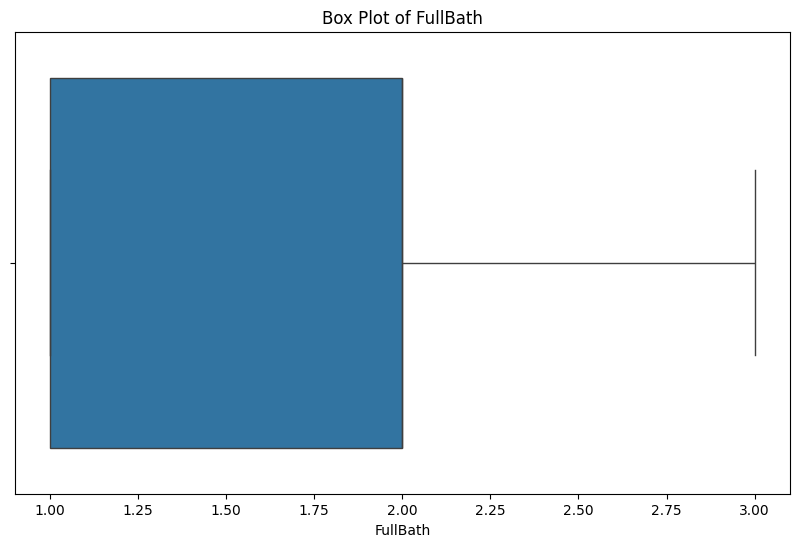

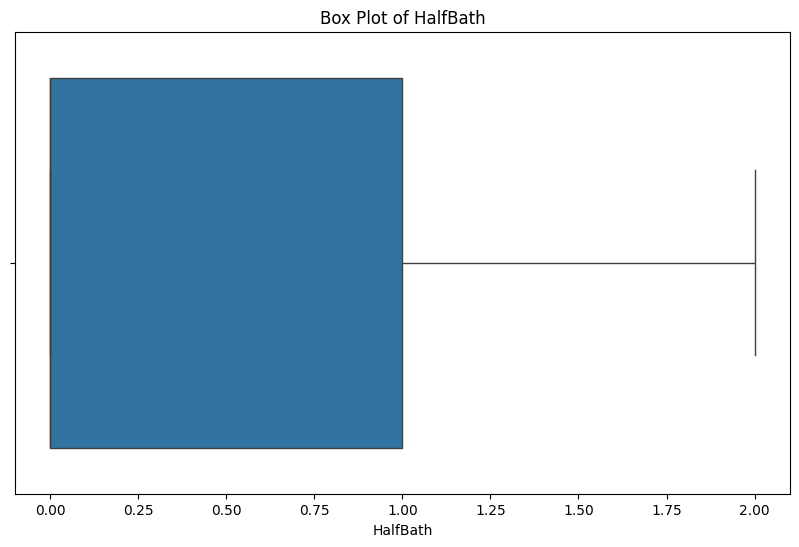

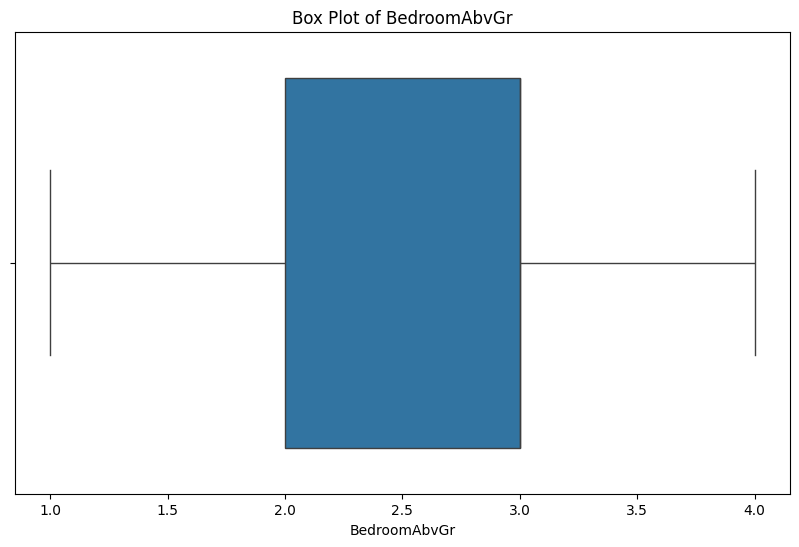

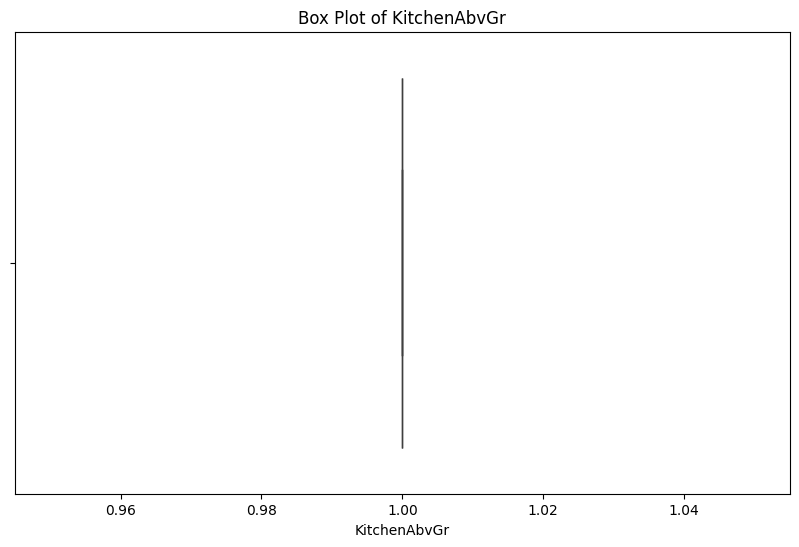

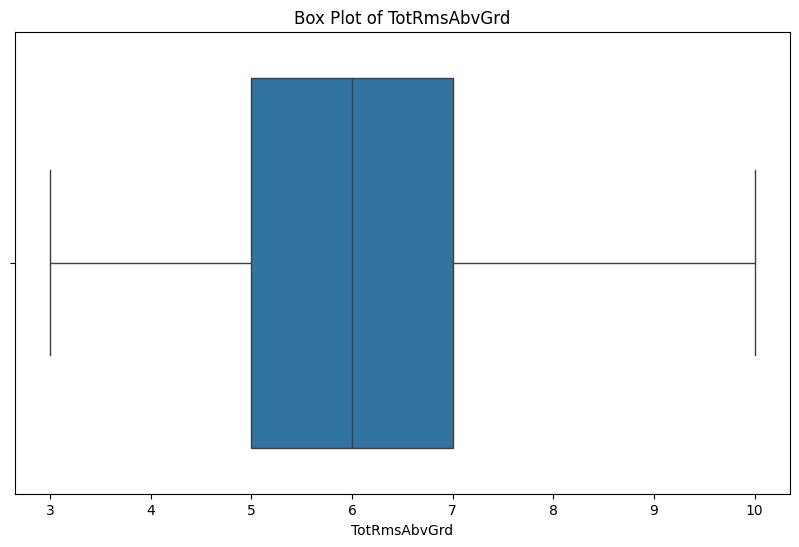

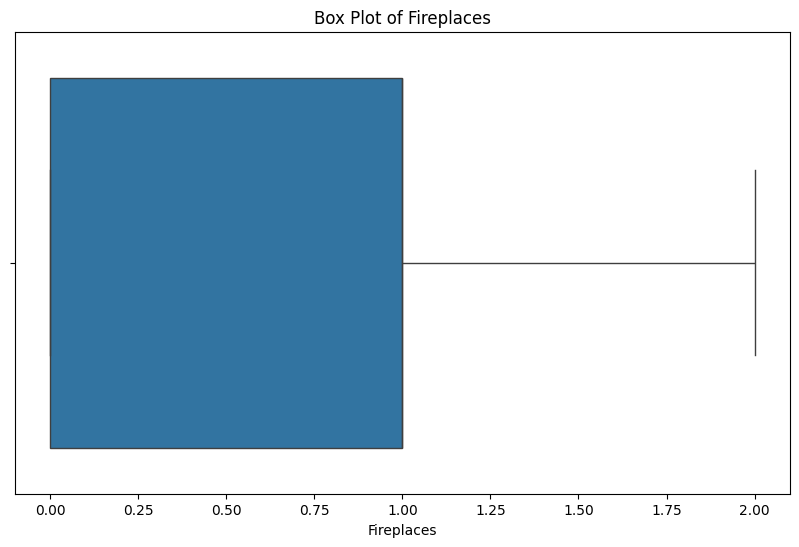

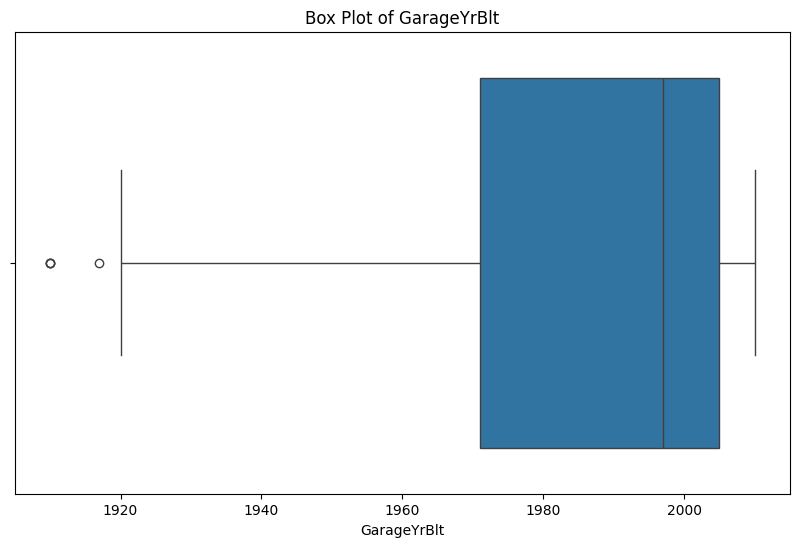

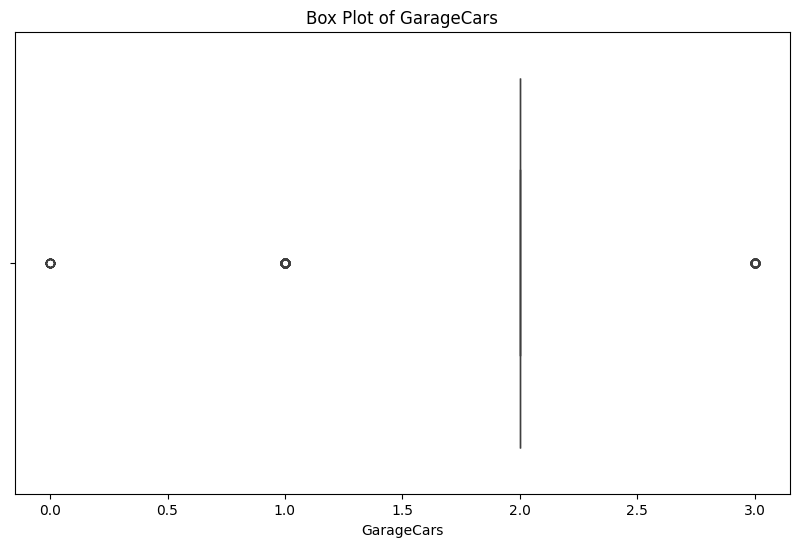

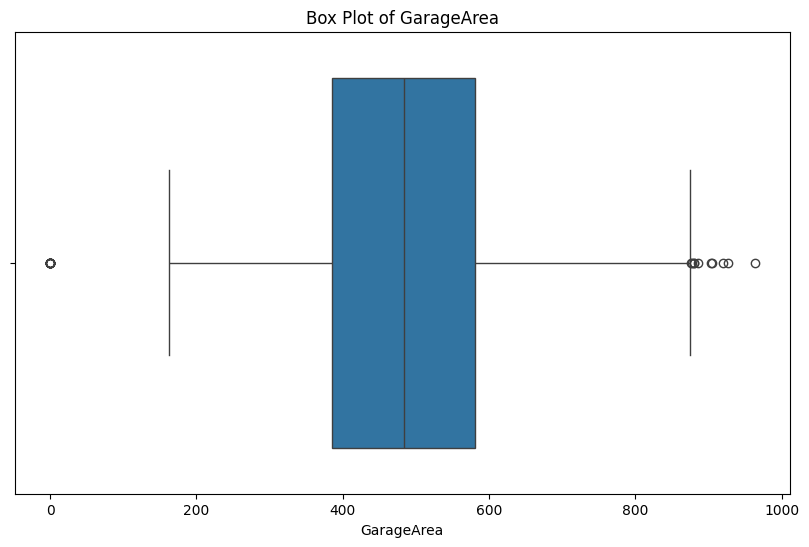

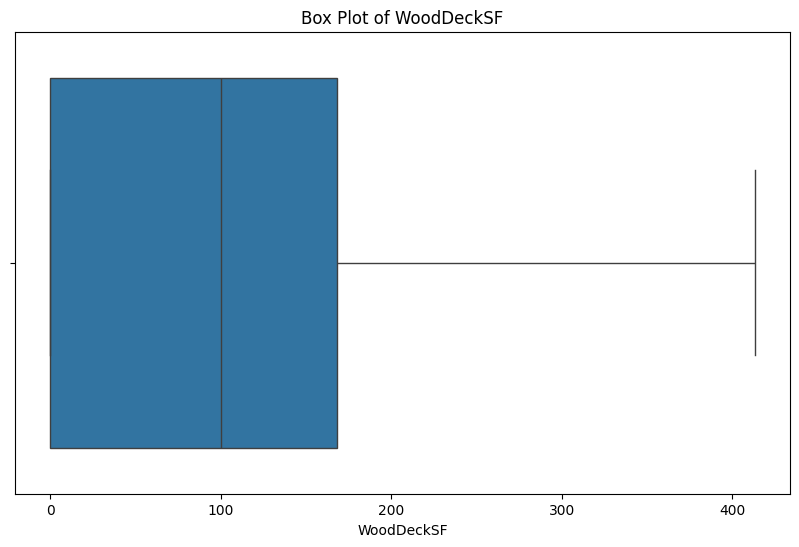

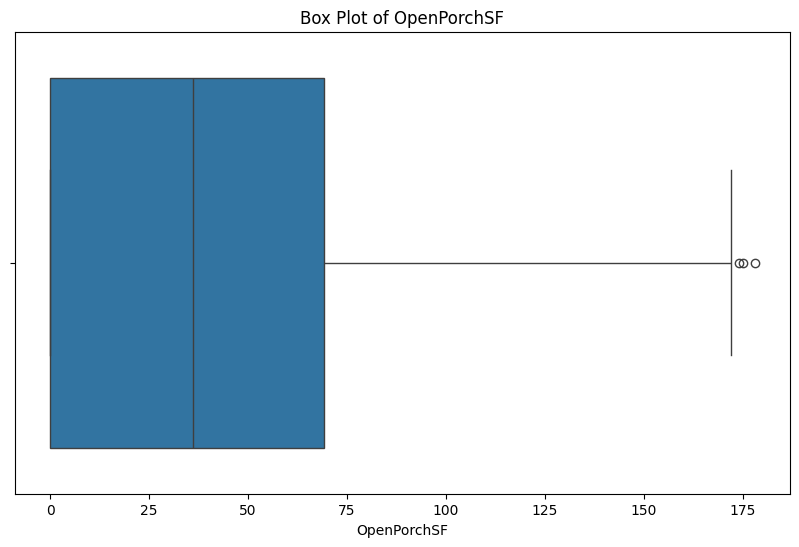

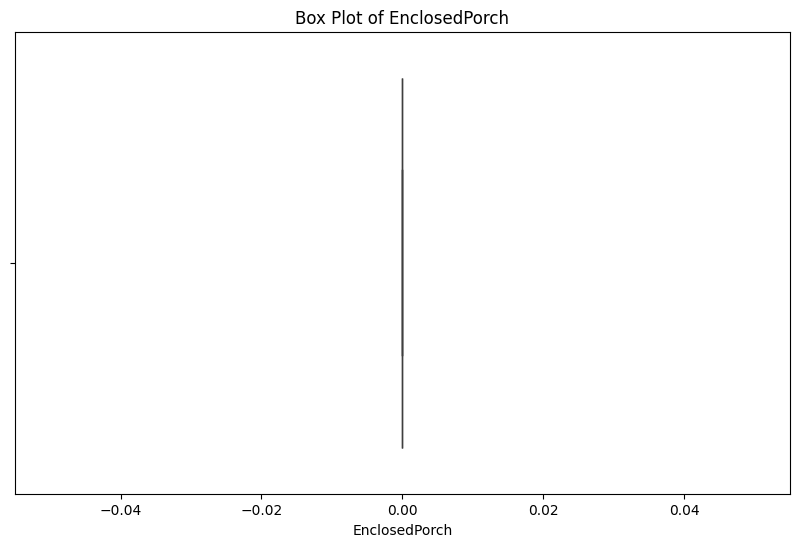

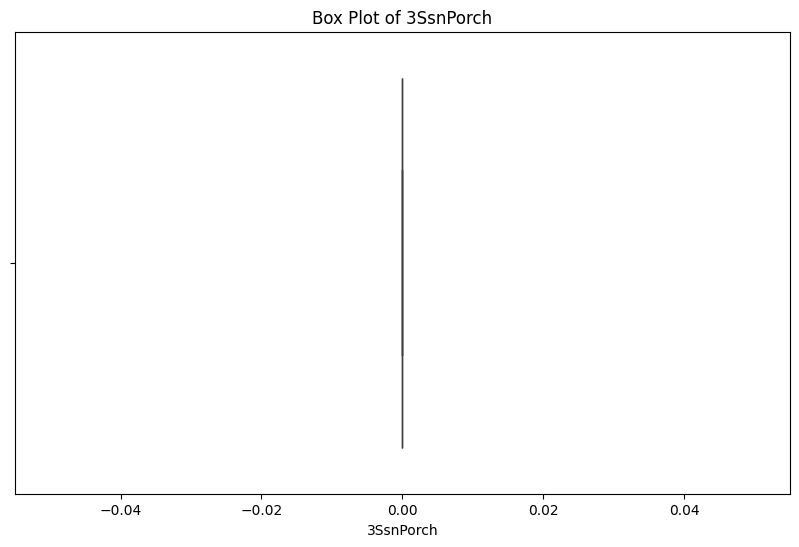

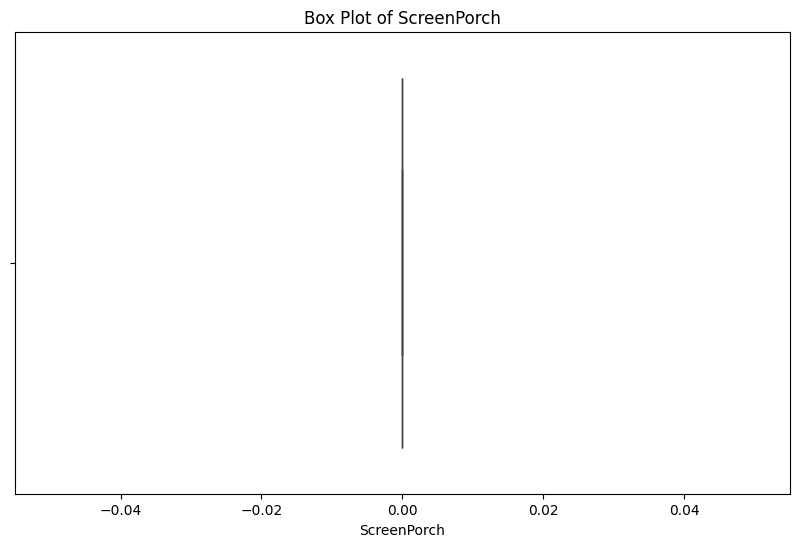

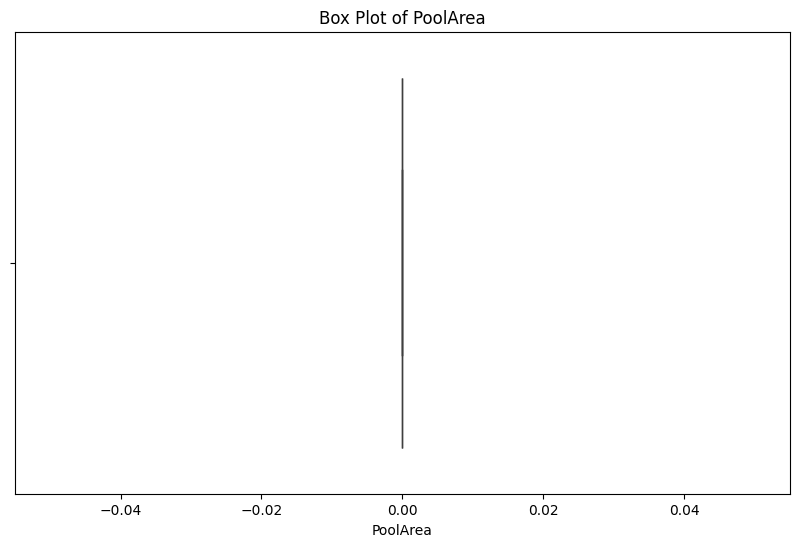

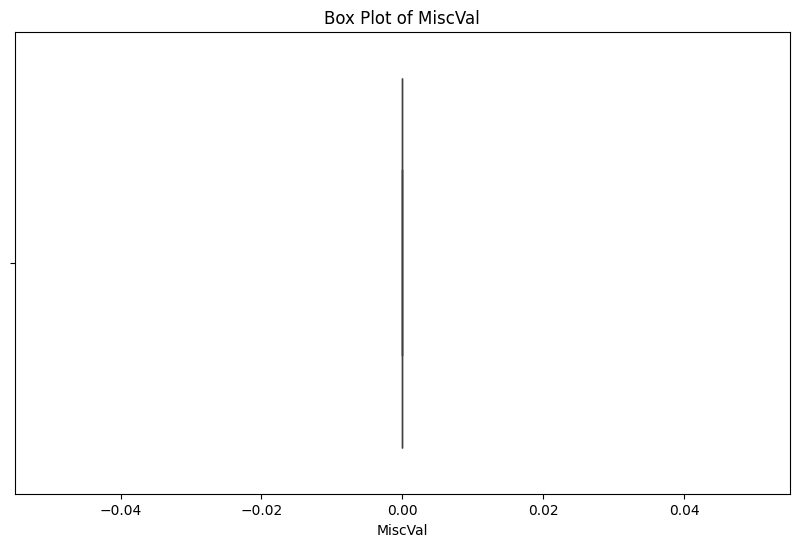

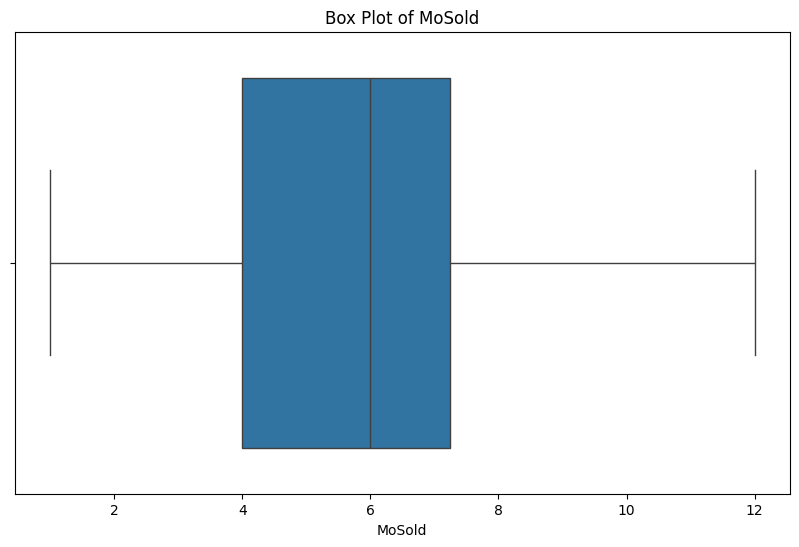

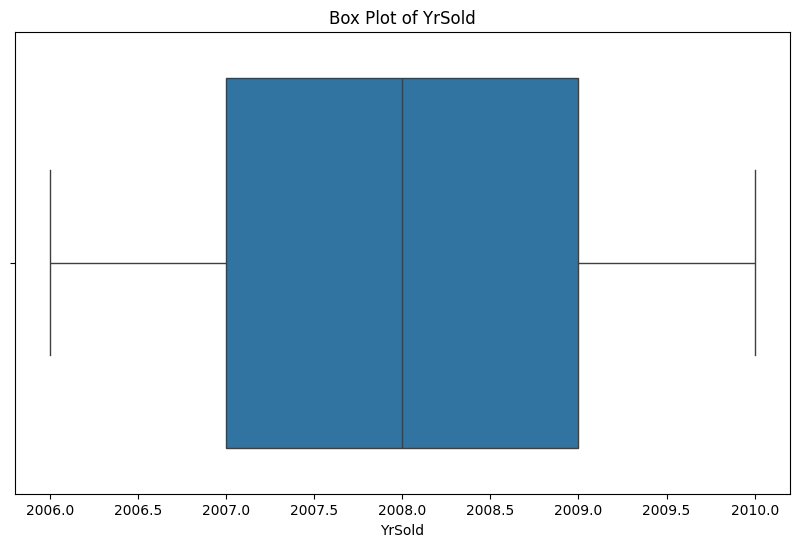

In [11]:
# Memeriksa kembali Dataset apakah masih ada Outlier atau tidak
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=(df[feature]))
    plt.title(f'Box Plot of {feature}')
    plt.show()

Text(0.5, 1.0, 'Histogram sebelum Standardisasi')

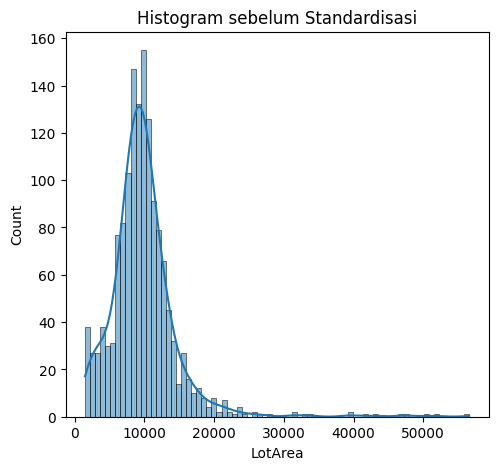

In [12]:
# Melakukan Standardisasi pada Dataset karena membutuhan distribusi normal
from sklearn.preprocessing import StandardScaler

# Standardisasi fitur numeri
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Melakukan perbandingan antara data sebelum dan sesudah Standardisasi\
# Histogram sebelum Standardisasi
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(test[numeric_features[3]], kde=True)
plt.title('Histogram sebelum Standardisasi')

Text(0.5, 1.0, 'Histogram Sesudah Standardisasi')

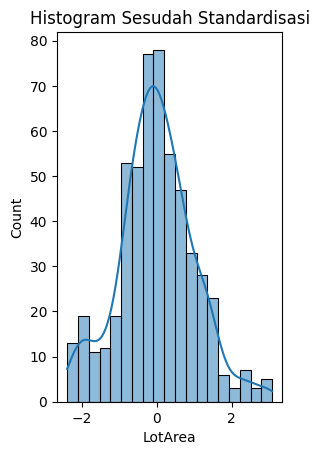

In [13]:
# Histogram sesudah standardisasi
plt.subplot(1, 2, 2)
sns.histplot(df[numeric_features[3]], kde=True)
plt.title('Histogram Sesudah Standardisasi')

Standardisasi ini akan meningkatkan kinerja model dengan menyamakan skala fitur, mempercepat konvergensi algoritma optimasi, dan mengurangi risiko overfitting

In [15]:
# Menangani duplikat data

# Mengidentifikasi baris duplikat
duplicates = df.duplicated()

print("Baris Duplikat: ")
print(df[duplicates])

Baris Duplikat: 
Empty DataFrame
Columns: [Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, MSZoning, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, SaleType, SaleCondition]
Index: []

[0 rows x 76 columns]


Tidak ada satupun terindifikasi sebagai duplikat.

In [17]:
# Meliat data Kategoral pada Dataset
category_features = df.select_dtypes(include=['object']).columns
df[category_features]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,WD,Normal
5,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
7,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,Y,WD,Normal
8,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,Gd,Typ,Po,Attchd,Unf,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,C (all),Grvl,Reg,Bnk,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,...,TA,Typ,Gd,Attchd,Unf,TA,TA,N,WD,Normal
1438,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,Mitchel,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1442,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,Timber,Norm,Norm,...,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,New,Partial
1447,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,TA,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal


Kita akan menggunakan metode one hot encoding atau label encoding karena data kategorikal yang ada pada dataset ini tidak memiliki urutan.
